# Libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load Image

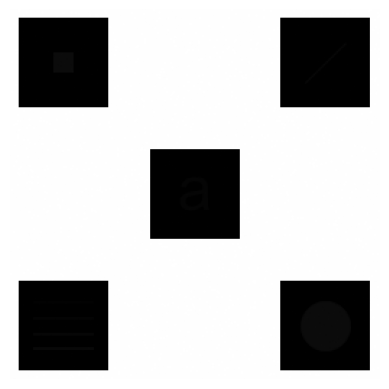

In [3]:
img = cv2.imread('hidden_object_2.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Useful Functions

In [4]:
def show_images(image, image_new):
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image_new, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    plt.show()

def get_pdf(image):
    hist, _ = np.histogram(image.flatten(), 256, [0, 255])
    return hist / image.size

def get_stats(pdf):
    indices = np.arange(len(pdf))
    mean = np.sum(indices * pdf)
    variance = np.sum(((indices - mean) ** 2) * pdf)
    std_dev = np.sqrt(variance)
    return mean, std_dev

def histStatistic(image, kernel_size=(7, 7), C=22.8, k_params=[0, 0.1, 0, 0.1]):
    global_pdf = get_pdf(image)
    global_mean, global_std_dev = get_stats(global_pdf)

    kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])

    local_means = convolve2d(image, kernel, mode='same', boundary='wrap')
    local_squared_means = convolve2d(image ** 2, kernel, mode='same', boundary='wrap')
    local_std_devs = np.sqrt(local_squared_means - local_means ** 2)

    mask = (k_params[0] * global_mean <= local_means) & (local_means <= k_params[1] * global_mean) & \
           (k_params[2] * global_std_dev <= local_std_devs) & (local_std_devs <= k_params[3] * global_std_dev)

    image_new = np.copy(image)
    image_new[mask] = C * image[mask]

    return image_new

def CLAHEmethod(image, cliplimit=160, tileGridSize=(20, 20)):    
    clahe = cv2.createCLAHE(clipLimit=cliplimit, tileGridSize=tileGridSize)
    clahe_img = clahe.apply(image)
    return clahe_img

# Histogram Statistics method

C:\Users\vince\AppData\Local\Temp\ipykernel_37828\48199737.py:31: RuntimeWarning: invalid value encountered in sqrt
  local_std_devs = np.sqrt(local_squared_means - local_means ** 2)


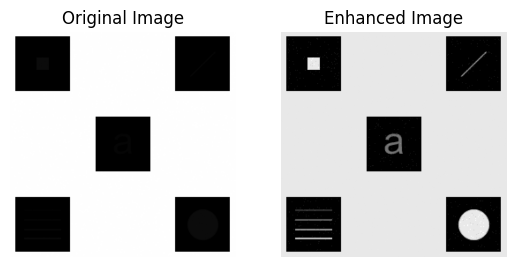

In [5]:
statistic_img = histStatistic(image=img)
show_images(img, statistic_img)

# Local Enhancement method

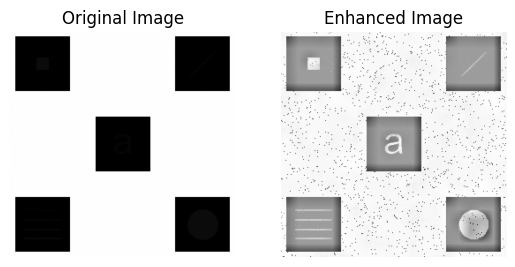

In [13]:
clahe_img = CLAHEmethod(img)
show_images(img, clahe_img)

# Appendix

### Useful functions in Appendix

In [7]:
def compareImages(image1, image2, img1_name, img2_name):
    plt.subplot(121)
    plt.imshow(image1, cmap='gray')
    plt.title(img1_name)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image2, cmap='gray')
    plt.title(img2_name)
    plt.axis('off')
    plt.show()

## Test about hidden object (scanned image)

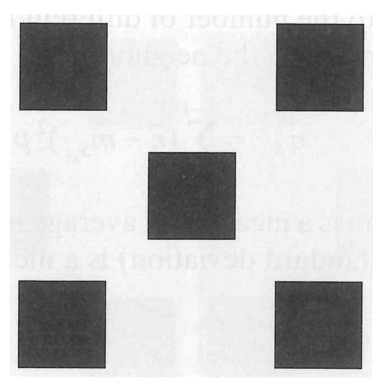

In [8]:
img2 = cv2.imread("hidden object.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

### Histogram statistic method & Local Enhancement method

C:\Users\vince\AppData\Local\Temp\ipykernel_37828\48199737.py:31: RuntimeWarning: invalid value encountered in sqrt
  local_std_devs = np.sqrt(local_squared_means - local_means ** 2)


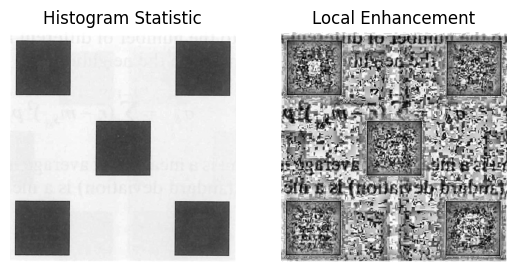

In [31]:
statistic_img2 = histStatistic(image=img2)
clahe_img2 = CLAHEmethod(img2)
plt.subplot(121)
plt.imshow(statistic_img2, cmap='gray')
plt.title('Histogram Statistic')
plt.axis('off')

plt.subplot(122)
plt.imshow(clahe_img2, cmap='gray')
plt.title('Local Enhancement')
plt.axis('off')

plt.show()

### Local Enhancement method (modified)

In [10]:
def ModifiedlocalEnhancement(image):
    _, black_mask = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output_image = image.copy()

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        black_region = image[y:y+h, x:x+w]
        equalized_region = cv2.equalizeHist(black_region)
        output_image[y:y+h, x:x+w] = equalized_region

    return output_image

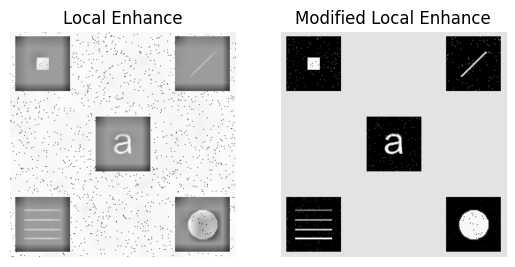

In [22]:
local_enhanced_img = ModifiedlocalEnhancement(image=img)
compareImages(clahe_img, local_enhanced_img, 'Local Enhance', 'Modified Local Enhance')